Ces exercices vous permettront de mettre en pratique les étapes de prétraitement de texte, telles que la tokenization, la suppression des mots vides et la lemmatisation, ainsi que l'utilisation de la TF-IDF pour l'analyse de texte. Vous serez en mesure de transformer un texte brut en une représentation numérique plus significative et d'effectuer des calculs sur les poids TF-IDF des mots. Les exercices vous aideront à comprendre comment ces techniques peuvent être appliquées pour l'analyse de texte, l'extraction de caractéristiques et la recherche d'informations pertinentes dans un document.

In [ ]:
# Installation et téléchargement de spaCy
!pip install -U spacy
!python -m spacy download fr_core_news_sm

#Prétraitement de texte avec tokenization, suppression des mots vides et lemmatisation

In [ ]:
import nltk
import os

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('stopwords')

# Ouvrir le fichier en lecture
base_file = open(os.getcwd() + "/Essentiel-Apache-Spark.txt", 'rt')

# Lire le contenu du fichier
raw_text = base_file.read()

# Fermer le fichier
base_file.close()

# Tokenization
token_list = nltk.word_tokenize(raw_text)

# Utiliser la bibliothèque 'punkt' pour extraire les jetons sans ponctuation
token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))


# Conversion en minuscules
token_list3 = [word.lower() for word in token_list2]

# Obtenir la liste des mots vides pour le français
from nltk.corpus import stopwords
stopwords_list = stopwords.words('french')

# Supprimer les mots vides de la liste de tokens
token_list4 = [token for token in token_list3 if token not in stopwords_list]

import spacy

# Charger le modèle linguistique français
nlp = spacy.load('fr_core_news_sm')

# Lemmatisation des tokens
doc = nlp(" ".join(token_list4))
token_list5 = [token.lemma_ for token in doc]

# Afficher le nombre total de tokens après le traitement
print("\nTokens totaux:", len(token_list5))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Tokens totaux: 58


#Générer les n-grammes (bigrammes et trigrammes

In [ ]:
from nltk.util import ngrams
from collections import Counter

# Générer les bigrammes à partir de la liste de tokens lemmatisés
bigrams = ngrams(token_list5, 2)

print("Bigrammes les plus courants : ")
# Utiliser Counter pour compter le nombre d'occurrences de chaque bigramme
# et afficher les 5 bigrammes les plus courants
print(Counter(bigrams).most_common(5))

# Générer les trigrammes à partir de la liste de tokens lemmatisés
trigrams = ngrams(token_list5, 3)

print("\nTrigrammes les plus courants : ")
# Utiliser Counter pour compter le nombre d'occurrences de chaque trigramme
# et afficher les 5 trigrammes les plus courants
print(Counter(trigrams).most_common(5))


Bigrammes les plus courants : 
[(('apache', 'spark'), 2), (('si', 'intéresser'), 1), (('intéresser', 'big'), 1), (('big', 'dater'), 1), (('dater', 'connaître'), 1)]

Trigrammes les plus courants : 
[(('si', 'intéresser', 'big'), 1), (('intéresser', 'big', 'dater'), 1), (('big', 'dater', 'connaître'), 1), (('dater', 'connaître', 'certainement'), 1), (('connaître', 'certainement', 'apache'), 1)]


#Étiquetage grammatical des tokens lemmatisés

In [ ]:
# Télécharger les ressources nécessaires pour l'étiquetage grammatical
nltk.download('averaged_perceptron_tagger')

# Obtenir les étiquettes grammaticales des tokens lemmatisés
nltk.pos_tag(token_list5)[:10]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('si', 'NN'),
 ('intéresser', 'NN'),
 ('big', 'JJ'),
 ('dater', 'NN'),
 ('connaître', 'NN'),
 ('certainement', 'NN'),
 ('apache', 'NN'),
 ('spark', 'NN'),
 ('savoir', 'VBP'),
 ('vous', 'JJ')]

#Étiquetage grammatical des tokens avec spaCy

In [ ]:
#tager le texte en utilisant spacy
doc = nlp(" ".join(token_list5))
pos_tags = [(d.text,d.pos_) for d in doc]
# Afficher les premièrs mots
print(pos_tags[:10])

[('si', 'SCONJ'), ('intéresser', 'VERB'), ('big', 'PRON'), ('dater', 'VERB'), ('connaître', 'VERB'), ('certainement', 'ADV'), ('apache', 'NOUN'), ('spark', 'ADJ'), ('savoir', 'VERB'), ('vous', 'PRON')]


In [ ]:
# Installer ou mettre à jour les bibliothèques scikit-learn et nltk
!pip install -U scikit-learn nltk

# Afficher la matrice TF-IDF
Ce code utilise la classe TfidfVectorizer de scikit-learn pour créer une matrice TF-IDF à partir des tokens lemmatisés. La liste sentences contient une seule phrase qui est une concaténation de tous les tokens lemmatisés. Ensuite, le vectoriseur TfidfVectorizer est utilisé pour calculer la matrice TF-IDF à partir de cette liste de phrases. Les noms des fonctionnalités (tokens) sont obtenus à l'aide de la méthode get_feature_names_out(). Enfin, une DataFrame est créée à partir de la matrice TF-IDF pour afficher les résultats.

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Créer une liste de phrases avec les tokens lemmatisés
sentences = [' '.join(token_list5)]

# Créer un vectoriseur pour les tokens lemmatisés avec TF-IDF
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(sentences)

# Obtenir les noms des fonctionnalités (tokens)
feature_names = vectorizer.get_feature_names_out()

# Créer une DataFrame pour la matrice TF-IDF des tokens lemmatisés
df = pd.DataFrame(tfidf.toarray(), columns=feature_names)

# Afficher la matrice TF-IDF des tokens lemmatisés
print("\nMatrice TF-IDF des tokens lemmatisés :")
print(df)



Matrice TF-IDF des tokens lemmatisés :
   algorithme  analyser    apache  apprécier  associer    autant       big  \
0    0.114708  0.114708  0.344124   0.114708  0.114708  0.114708  0.114708   

   certainement       clé  connaître  ...        si     spark  technique  \
0      0.114708  0.114708   0.114708  ...  0.114708  0.344124   0.114708   

   technologier      tout  traitement   travers      vous   échelle      être  
0      0.114708  0.229416    0.114708  0.114708  0.114708  0.114708  0.114708  

[1 rows x 51 columns]


#Exemple 2

In [ ]:
# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pandas as pd

# Download the required resources
nltk.download('stopwords')

# Define the corpus for visualization
vector_corpus = [
    'Fouille du texte en R et Python : 8 conseils pour démarrer',
    'Fouille du texte avec R : collecte et nettoyage de données',
    "L'analyse des sentiments dans R simplifiée"
]

# Create a vectorizer for the French language
vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('french'))
tfidf = vectorizer.fit_transform(vector_corpus)

# Obtain the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with the TF-IDF matrix
df1 = pd.DataFrame(tfidf.toarray(), columns=feature_names)
print("\nMatrice TF-IDF :")
print(df)



Matrice TF-IDF :
   algorithme  analyser    apache  apprécier  associer    autant       big  \
0    0.114708  0.114708  0.344124   0.114708  0.114708  0.114708  0.114708   

   certainement       clé  connaître  ...        si     spark  technique  \
0      0.114708  0.114708   0.114708  ...  0.114708  0.344124   0.114708   

   technologier      tout  traitement   travers      vous   échelle      être  
0      0.114708  0.229416    0.114708  0.114708  0.114708  0.114708  0.114708  

[1 rows x 51 columns]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Analyse de la fréquence des mots et mot le plus fréquent

In [ ]:
# Calculer la fréquence totale des mots
word_freq = df1.sum()

# Trouver le mot le plus fréquent
most_frequent_word = word_freq.idxmax()

# Afficher la fréquence totale des mots et le mot le plus fréquent
print("\nFréquence totale des mots :")
print(word_freq)
print("\nMot le plus fréquent :")
print(most_frequent_word)



Fréquence totale des mots :
analyse       0.577350
collecte      0.490479
conseils      0.490479
données       0.490479
démarrer      0.490479
fouille       0.746044
nettoyage     0.490479
python        0.490479
sentiments    0.577350
simplifiée    0.577350
texte         0.746044
dtype: float64

Mot le plus fréquent :
fouille


#Visualisation de la fréquence des mots

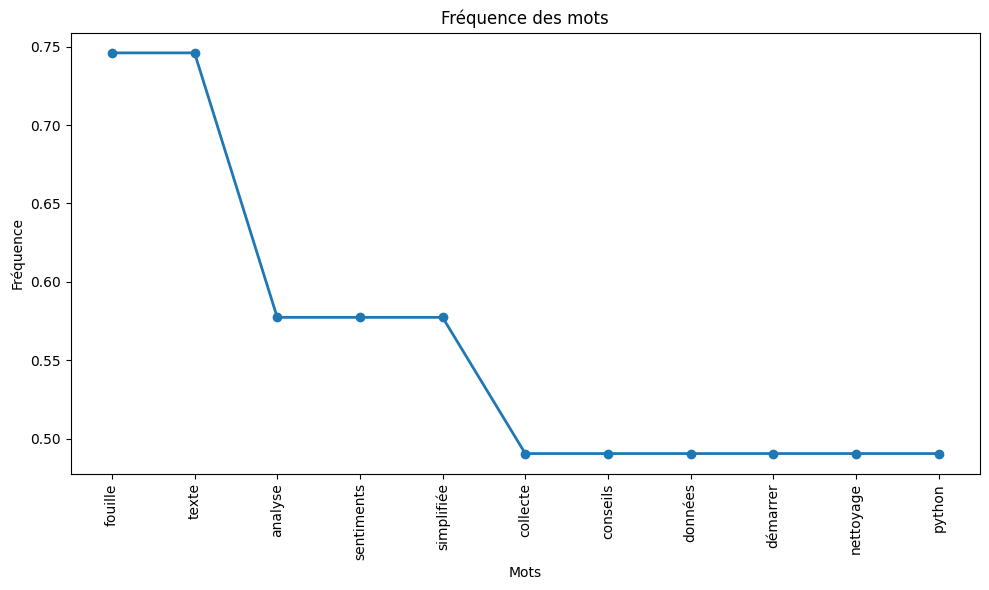

In [ ]:
# Tri des fréquences de mots par ordre décroissant
sorted_word_freq = word_freq.sort_values(ascending=False)

# Tracé des fréquences des mots à l'aide d'un diagramme en ligne
plt.figure(figsize=(10, 6))
plt.plot(sorted_word_freq.index, sorted_word_freq.values, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Fréquence des mots')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
